In [1]:
import pandas as pd
import numpy as np

avs = ["Ad-Aware", "AhnLab-V3", "Acronis", "Ad-Aware", "Alibaba", "ALYac", "Antiy-AVL", "Avast", "AVG", 
       "Avira (no cloud)", "BitDefender", "BitDefenderTheta", "Comodo", 
       "CrowdStrike Falcon", "Cybereason", "Cylance", "Cynet", "Cyren", "DrWeb", 
       " Elastic", "Emsisoft", "eScan", "ESET-NOD32", "Fortinet", "GData", "Ikarus", 
       "Jiangmin", "K7AntiVirus", "K7GW", "Kaspersky", "Lionic", "Malwarebytes", "MAX", 
       "McAfee", "McAfee-GW-Edition", "Microsoft", "NANO-Antivirus", "Palo Alto Networks", 
       "Panda", "QuickHeal", "Sangfor Engine Zero", "SecureAge", "SentinelOne (Static ML)", 
       "Sophos", "Symantec", "Tencent", "Trellix (FireEye)", "TrendMicro", "TrendMicro-HouseCall", 
       "VBA32", "VIPRE", "Yandex", "Zillya", "ZoneAlarm by Check Point", "Acronis (Static ML)", "Arcabit",
       "Baidu", "Bkav Pro", "ClamAV", "CMC", "Gridinsoft (no cloud)", "Kingsoft", "MaxSecure",
       "Rising", "SUPERAntiSpyware", "TACHYON", "ViRobot", "Webroot", "WithSecure", "Zoner", "Avast-Mobile", 
       "BitDefenderFalx", "Symantec Mobile Insight", "Trapmine", "Trustlook", "SuperAntiSpyware", "Security", 
       "vendors'", "analysis", "automate", "checks", "want", "you"]

def removeAllOccurenceStr(inputs, target:str):
    while (inputs.count(target)):
        inputs.remove(target) 
    return inputs

def removeAllOccurenceList(inputs, ls:list):
    for l in ls:
        ls = removeAllOccurenceStr(inputs, l.lower())
    return inputs

isnone = False
def findType1(vt:list):
    '''
    List from VirusTotal:
    ["adware","banker","downloader","dropper","fakeav","hacktool","miner","phishing","pua","ransomware","spyware","trojan","virus","worm"]
    Disregard phishing and fakeav
    '''
    types = [['trojan', 0],['adware',0],['downloader',0],['ransomware',0],['miner',0],['dropper',0],['pua',0],['virus',0],['miner',0],['undetected',0],['worm',0],['spyware',0],['banker',0]]
    for v in vt:
        if "not" not in v:
            if "troj" in v or "trj" in v:
                types[0][1] += 1
            if "adw" in v:
                types[1][1] += 1
            if "down" in v:
                types[2][1] += 1
            if "rans" in v:
                types[3][1] += 1
            if "mine" in v or "crypt" in v:
                types[4][1] += 1
            if "drop" in v:
                types[5][1] += 1
            if "pua" in v or "pup" in v or "susp" in v or "bundl" in v or "gray" in v or "grey" in v:
                types[6][1] += 1
            if ("vir" in v) and ("not-a-vi" not in v):
                types[7][1] += 1
            if "hack" in v:
                types[8][1] += 1
            if "undetected" in v:
                types[9][1] += 1
            if "worm" in v:
                types[10][1] += 1
            if "spy" in v or "backd" in v:
                types[11][1] += 1
            if "bank" in v:
                types[12][1] += 1
    # types[3][1] += int(types[3][1] * .5) # Increase ransomware by 50% due to its severity
    types[9][1] = int(types[9][1]*.05) # <=== Adjusting quantity 'undetected' to be non-invasive of other malware types.
    types.sort(key=lambda x: x[1], reverse=True)
    print(types,"\n")
    return types

filename = 'test_clustering.csv' # <== Update this to point to the <Data_Clustering>_SampleHash_Common.csv file
df = pd.read_csv(filename)
df['Type 1'] = df['Type 1'].astype('str')

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
type_1_pos = 3

for r in range(df.shape[0]):
    if(type(df.iloc[r,type_1_pos]) == str and (" " in df.iloc[r,type_1_pos] or "\n" in df.iloc[r,type_1_pos])):
        vt = df.iloc[r,type_1_pos].lower().replace(" ", "\n").split("\n")
        for v in range(len(vt)):
            vt[v] = vt[v].strip()
        vt = removeAllOccurenceList(vt, avs)
        vt = removeAllOccurenceStr(vt, "Unable to process file type".lower())
        vt.sort()
        df.iloc[r,type_1_pos] = findType1(vt)[0][0]

[['downloader', 4], ['undetected', 3], ['adware', 2], ['pua', 2], ['trojan', 1], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 23], ['pua', 13], ['adware', 4], ['miner', 1], ['downloader', 0], ['ransomware', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 13], ['adware', 12], ['pua', 11], ['downloader', 2], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 18], ['pua', 12], ['adware', 5], ['dropper', 2], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['downloader', 19], ['pua', 14], ['trojan', 9], ['adware', 9], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['sp

,hash,pattern,cluster,Type 1
0,141033c954dd6f6e27431648b81072b5,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",532,downloader
1,3f86e2067108c387ee35522328380e07,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",47,trojan
2,b00039fc129bdba3a4413e6a28b51020,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,trojan
3,d7a27748c1916a6da8bb4906c02cb8f8,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp...",59,trojan
4,f5d892c65cbbabb429eb491be13fd2a8,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp...",3,downloader
...,...,...,...,...
447,cf72bbd4bbe18292e0c2538ac94d8cb1,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",-1,pua
448,5f0c71c42edfdd3c2e6cc572baec6cb9,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp...",21,trojan
449,3f88a9d8a8adc63fccb259c11ea52a6e,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",105,trojan
450,b7fb3f91a89f2d49ded34b0e73461c27,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",-1,trojan


Type 1
trojan        364
pua            30
adware         20
_              19
downloader     13
miner           3
ransomware      2
spyware         1
Name: count, dtype: int64

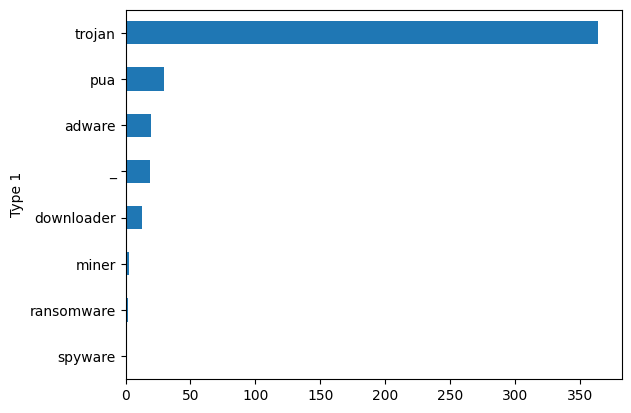

In [3]:
df.replace(to_replace='undetected', value='_', inplace=True) # <=== Replaces 'undetected' with '_'
df.replace(to_replace='nan', value='', inplace=True) # <=== Replaces 'undetected' with '_'
# if isnone:
#     df.loc[df['Type 1'].str.contains('none'), 'Type 1'] = '_'
df.to_csv('VirusTotal_Parsed.csv', index=False)
display(df)

display(df['Type 1'].value_counts(ascending=False))
df['Type 1'].value_counts(ascending=True).plot(kind='barh')

cluster = df['cluster'].unique().tolist()
for c in cluster:
    counts = df[df['cluster'] == c]['Type 1'].value_counts()